## IMporting the Liberaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Datasets

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [4]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

### Training the SOM

In [9]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

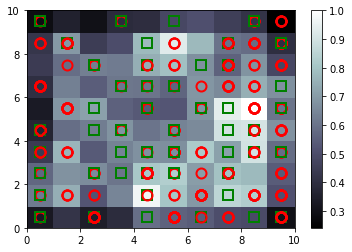

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [15]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,1)], mappings[(8,5)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [16]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15790254
15801441
15788131
15699963
15764841
15748649
15729718
15667588
15594305
15664793
15670029
15662189
15568469
15586479
15717700
15705379
15646535
15749964
